### K means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import copy
import random
from sklearn import datasets
%matplotlib inline

In [2]:
#random.sample(range(0, 100), 10)
X=np.array([58,55,59,35,90,4,91,87,23,9,12,67,90,8,3,4.5,33,46])
c_initialize=np.array([27,95,5])

In [3]:
def distance(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [4]:
cluster=np.zeros(len(X))
c_old_centroid=np.zeros(len(c_initialize))
centroid_copies=np.zeros(len(c_initialize))
## when their is no change in centroids k-means converges
## We can also use cluster label for calculating error
error=distance(x=c_old_centroid,y=c_initialize)
while error!=0:
    for i in range(len(X)):
        cluster_position=np.argmin(np.sqrt((X[i]-c_initialize)**2))
        cluster[i]=cluster_position
    
    '''
    Making copies of all old cluster centroids
    
    '''
    c_old_centroid=copy.copy(c_initialize)
    
    
    for k in range(len(np.unique(cluster))):
        copies=np.mean(X[cluster==np.unique(cluster)[k]])
        centroid_copies[k]=copies
    c_initialize=copy.copy(centroid_copies)
    
    error=distance(x=c_old_centroid,y=c_initialize)
print("cluster lableing are",cluster)
print("Value of new K means cluster centroids is",c_old_centroid)

cluster lableing are [0. 0. 0. 0. 1. 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 0. 0.]
Value of new K means cluster centroids is [47.66666667 85.          9.07142857]


In [5]:
centers_neat = [(-10, 10), (0, -5)]
x_neat, _ = datasets.make_blobs(n_samples=5000,
                                centers=centers_neat,
                                cluster_std=3,
                                random_state=123)

In [6]:
## Select the two farthest point
from scipy import spatial

# test points
#pts = np.random.rand(100_000, 2)

# two points which are fruthest apart will occur as vertices of the convex hull
candidates = x_neat[spatial.ConvexHull(x_neat).vertices]

# get distances between each pair of candidate points
dist_mat = spatial.distance_matrix(candidates, candidates)

# get indices of candidates that are furthest apart
i, j = np.unravel_index(dist_mat.argmax(), dist_mat.shape)

print(candidates[i], candidates[j])

[-20.76248149  13.44660843] [ 10.6769439  -10.01075366]


C:\Users\Pink\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:3465: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


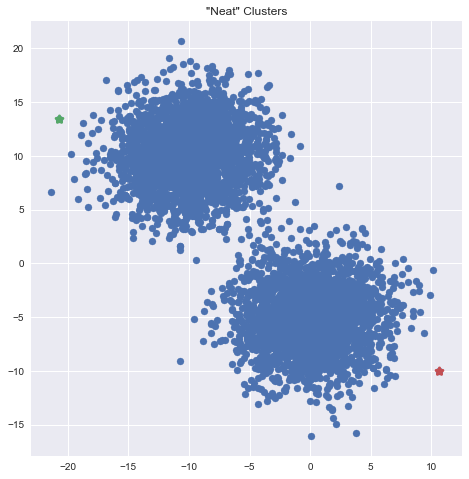

In [7]:
#Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

plt.figure(figsize=(17,8))
plt.subplot(121, title='"Neat" Clusters')
plt.scatter(x_neat[:,0], x_neat[:,1])

plt.scatter(x=-20.76248149,y= 13.44660843,marker='*',hold='red',linewidths=3)
plt.scatter(x=10.6769439,y= -10.01075366,marker='*',hold='red',linewidths=3)

In [8]:
## Centroid Initial points
C_x=[-20.76248149,10.6769439]
C_y=[13.44660843,-10.01075366]
c_initialize = np.array(list(zip(C_x, C_y)), dtype=np.float32)
c_initialize

array([[-20.762482,  13.446609],
       [ 10.676944, -10.010754]], dtype=float32)

In [9]:
# Euclidean Distance Caculator
def distance(x, y, ax=1):
    return np.linalg.norm(x - y, axis=ax)

In [10]:
c_old_centroid=np.zeros(c_initialize.shape)
cluster = np.zeros(len(x_neat))

In [11]:
for i in range(len(x_neat)):
    cluster[i]=np.argmin(distance(x_neat[i],c_initialize))
c_old_centroid=copy.copy(c_initialize)

In [12]:
for k in range(len(np.unique(cluster))):
    c_initialize[k]=np.mean(x_neat[cluster==np.unique(cluster)[k]],axis=0)
distance(c_old_centroid,c_initialize)

array([11.264995, 11.647966], dtype=float32)

In [13]:
c_initialize

array([[-9.999401  , 10.121522  ],
       [ 0.10766716, -5.1152973 ]], dtype=float32)

C:\Users\Pink\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:3465: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


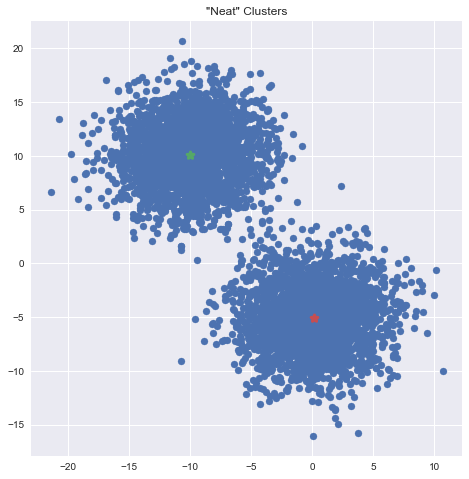

In [14]:
#Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

plt.figure(figsize=(17,8))
plt.subplot(121, title='"Neat" Clusters')
plt.scatter(x_neat[:,0], x_neat[:,1])

plt.scatter(x=-9.997539,y= 10.123496,marker='*',hold='red',linewidths=3)
plt.scatter(x=0.10580355,y= -5.117273,marker='*',hold='red',linewidths=3)